In [1]:
#Problem 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import torch

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
def binary_map(x):
    return x.map({'yes':1, "no": 0})

In [3]:
df = pd.DataFrame(pd.read_csv('Housing.csv'))
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[varlist] = df[varlist].apply(binary_map)
del df['furnishingstatus']
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [4]:
varlist = ['price','area','bedrooms','bathrooms','stories','parking']
df = df[varlist]
df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [5]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df))

y = df.values[:,0]
x = df.values[:,1:6]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = .8, test_size = .2)

In [7]:
x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train)
x_test = torch.tensor(x_test)
y_test = torch.tensor(y_test)

In [8]:
def model(t_u, w, b):
    return w[4]*t_u[:,4]+w[3]*t_u[:,4]+w[2]*t_u[:,3]+w[1]*t_u[:,2]+w[0]*t_u[:,1]+b

In [9]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [10]:
def dloss_fn(t_p, t_c): 
    dsq_diffs=2*(t_p-t_c)/t_p.size(0)
    return dsq_diffs

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [11]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw5 = dloss_dtp*dmodel_dw(t_u[:,4], w[4], b)
    dloss_dw4 = dloss_dtp*dmodel_dw(t_u[:,3], w[3], b)  
    dloss_dw3 = dloss_dtp*dmodel_dw(t_u[:,2], w[2], b)
    dloss_dw2 = dloss_dtp*dmodel_dw(t_u[:,1], w[1], b)
    dloss_dw1 = dloss_dtp*dmodel_dw(t_u[:,0], w[0], b)
    
    dloss_db = dloss_dtp*dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw5.sum(),dloss_dw4.sum(),dloss_dw3.sum(),
                        dloss_dw2.sum(),dloss_dw1.sum(), dloss_db.sum()])

In [12]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    train_loss_history = []; test_loss_history = []
    for epoch in range(1, n_epochs+1):
        w1, w2, w3, w4, w5, b = params
        w = torch.stack([w1, w2, w3, w4, w5])
        
        t_p = model(t_u, w, b)
        train_loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)

        params = params - learning_rate*grad
        
        x_val = model(x_test,w,b)
        test_loss = loss_fn(x_val, y_test)
        
        train_loss_history.append(float(train_loss))
        test_loss_history.append(float(test_loss))

        if epoch == 1 or epoch % 500 == 0:
            print('Epoch %d, Training Loss %f, Validation Loss %f ' % (epoch, float(train_loss),float(test_loss)))
    return params, train_loss_history,  test_loss_history

Epoch 1, Training Loss 1.421621, Validation Loss 1.353947 
Epoch 500, Training Loss 38.246537, Validation Loss 44.806952 
Epoch 1000, Training Loss 56817.625873, Validation Loss 58170.405638 
Epoch 1500, Training Loss 103037014.493344, Validation Loss 98327561.268088 
Epoch 2000, Training Loss 191812906373.306061, Validation Loss 178032238771.491974 
Epoch 2500, Training Loss 356191794582353.375000, Validation Loss 326980382844208.375000 
Epoch 3000, Training Loss 659157634320126336.000000, Validation Loss 602381906118069376.000000 
Epoch 3500, Training Loss 1217523992153619955712.000000, Validation Loss 1110570357522302631936.000000 
Epoch 4000, Training Loss 2246921812466694700924928.000000, Validation Loss 2047927281826386027741184.000000 
Epoch 4500, Training Loss 4145079518884080877620428800.000000, Validation Loss 3776723704908613977370525696.000000 
Epoch 5000, Training Loss 7645514876935452898495846940672.000000, Validation Loss 6965112863238026658649064079360.000000 
Prameters

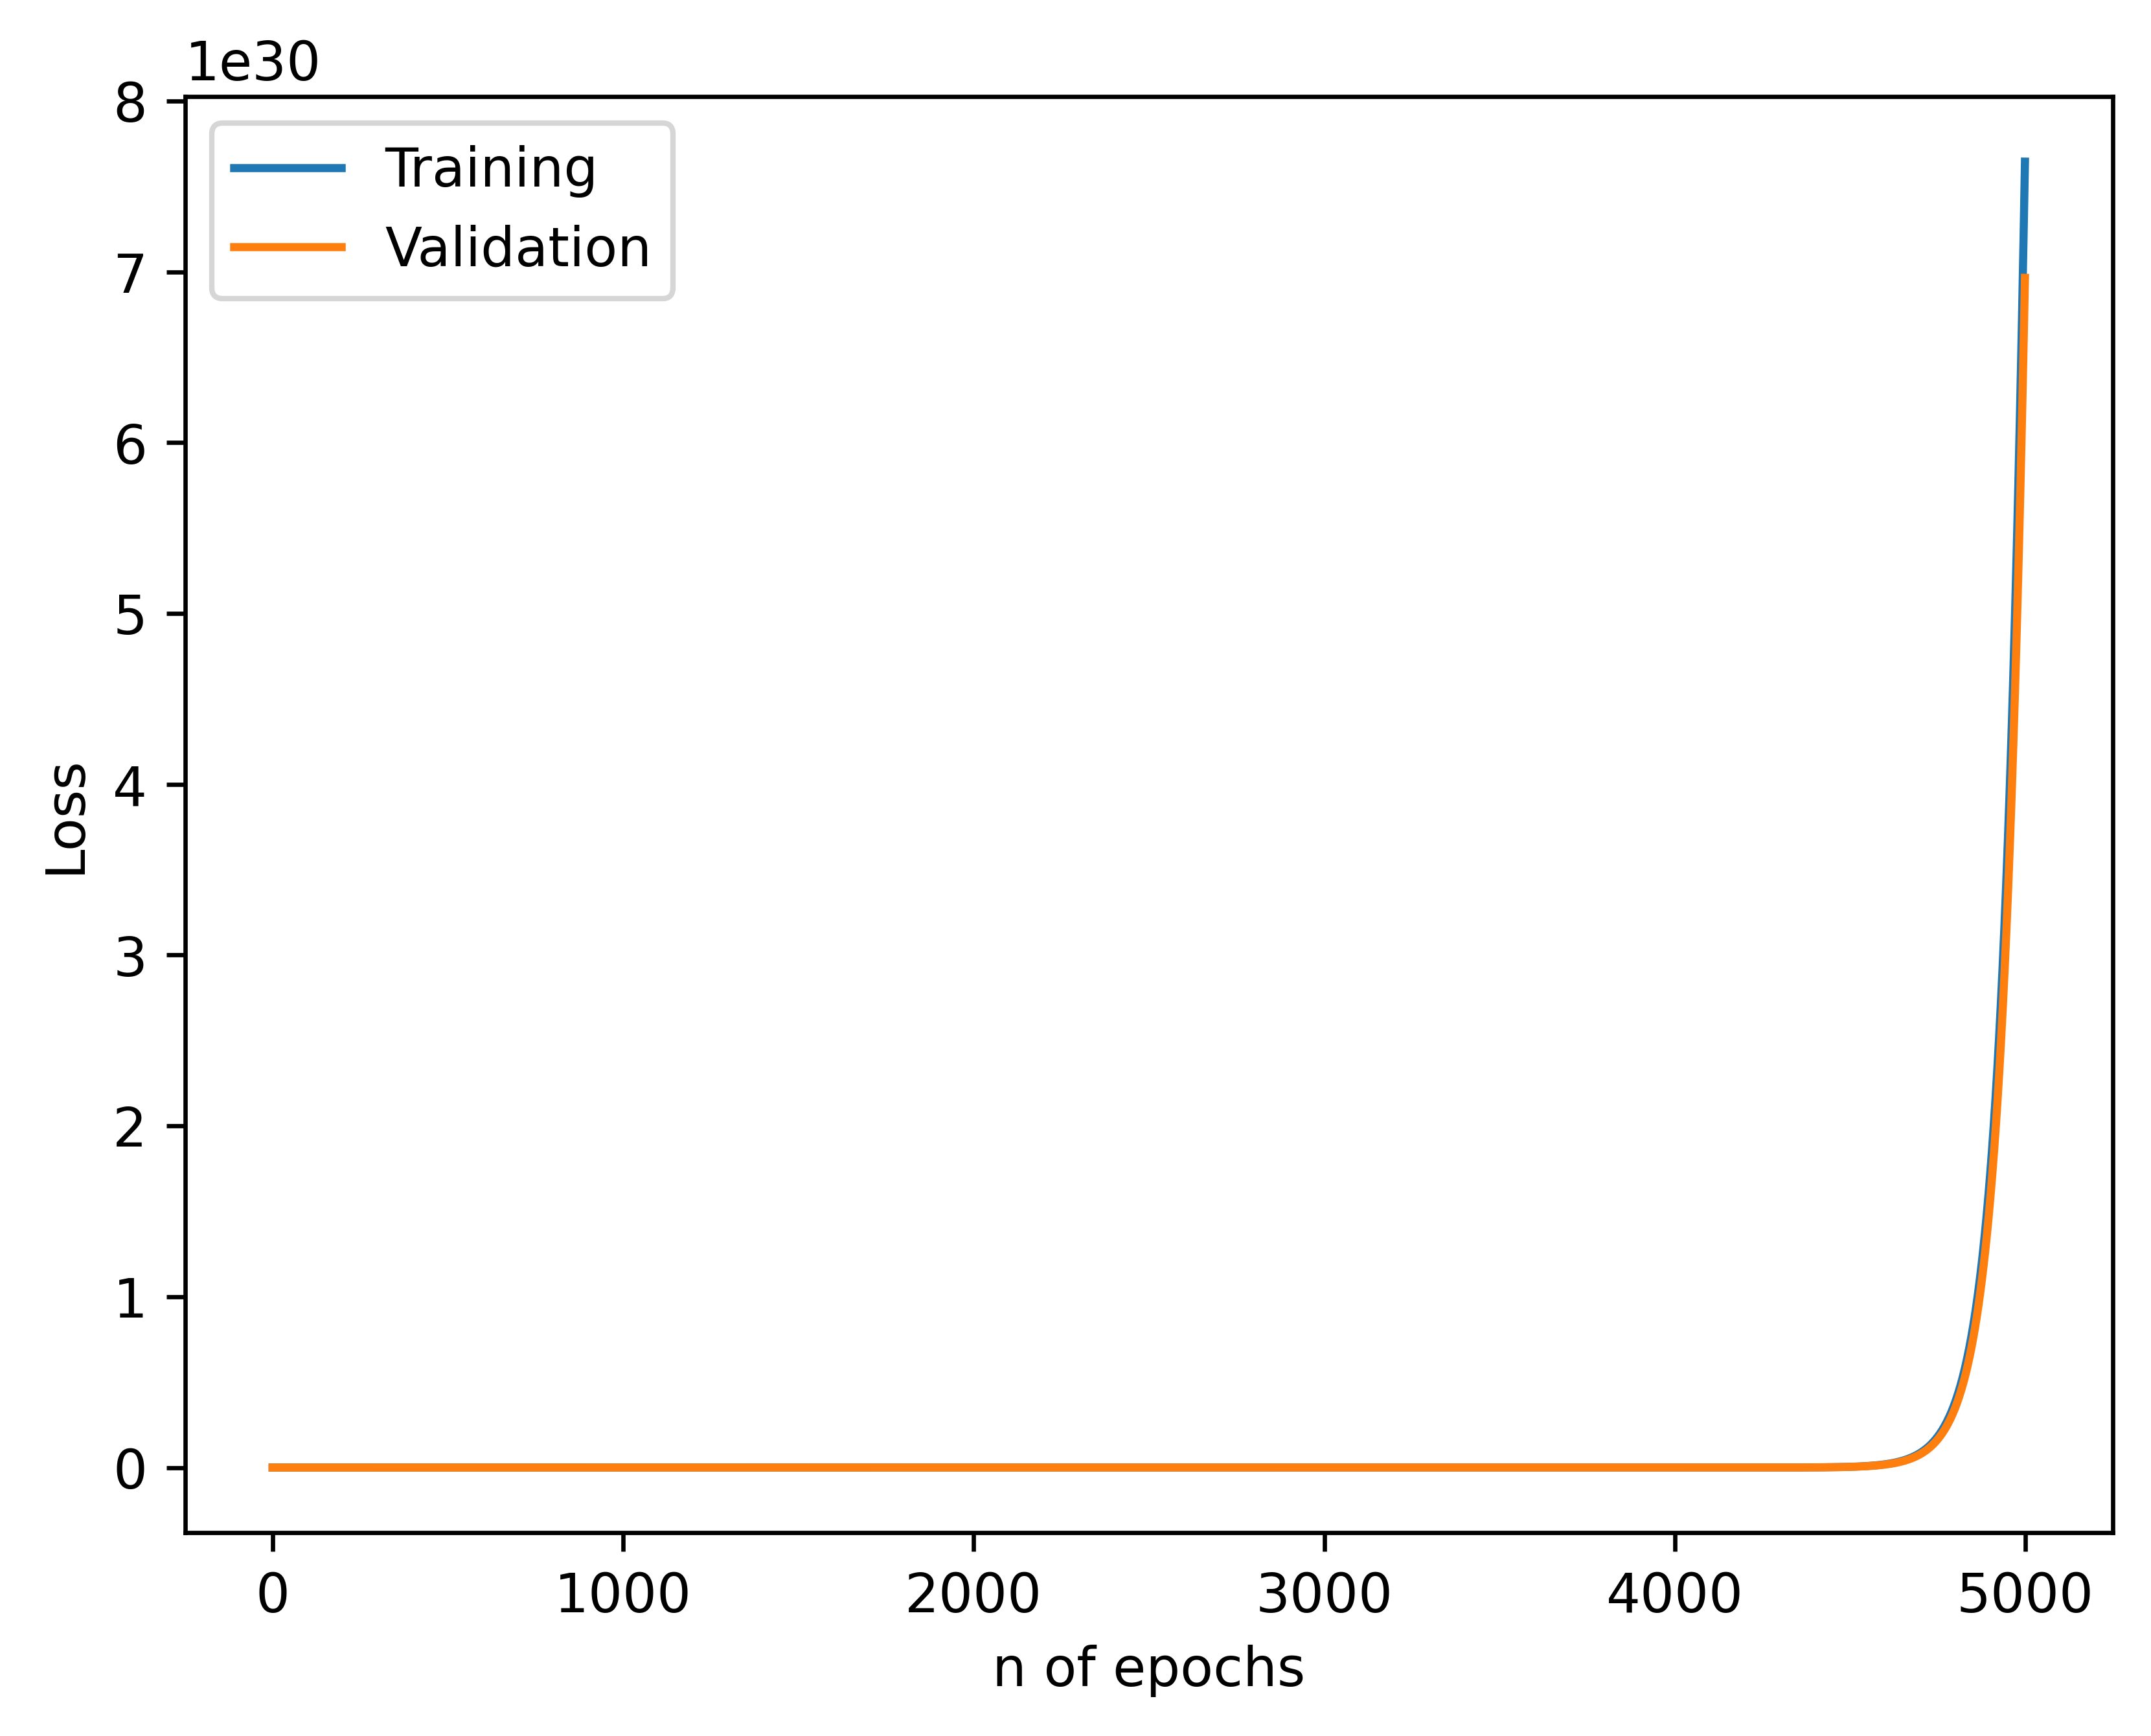

Epoch 1, Training Loss 1.421621, Validation Loss 1.353947 
Epoch 500, Training Loss 0.171181, Validation Loss 0.163641 
Epoch 1000, Training Loss 0.199559, Validation Loss 0.213815 
Epoch 1500, Training Loss 0.335213, Validation Loss 0.389572 
Epoch 2000, Training Loss 0.630387, Validation Loss 0.759260 
Epoch 2500, Training Loss 1.227555, Validation Loss 1.495957 
Epoch 3000, Training Loss 2.424518, Validation Loss 2.954869 
Epoch 3500, Training Loss 4.828591, Validation Loss 5.849589 
Epoch 4000, Training Loss 9.680437, Validation Loss 11.615910 
Epoch 4500, Training Loss 19.527534, Validation Loss 23.156870 
Epoch 5000, Training Loss 39.628123, Validation Loss 46.373018 
Prameters: tensor([-33.5093,   9.6395,  -0.7770,  17.5491,  -0.6664,   8.7226],
       dtype=torch.float64)


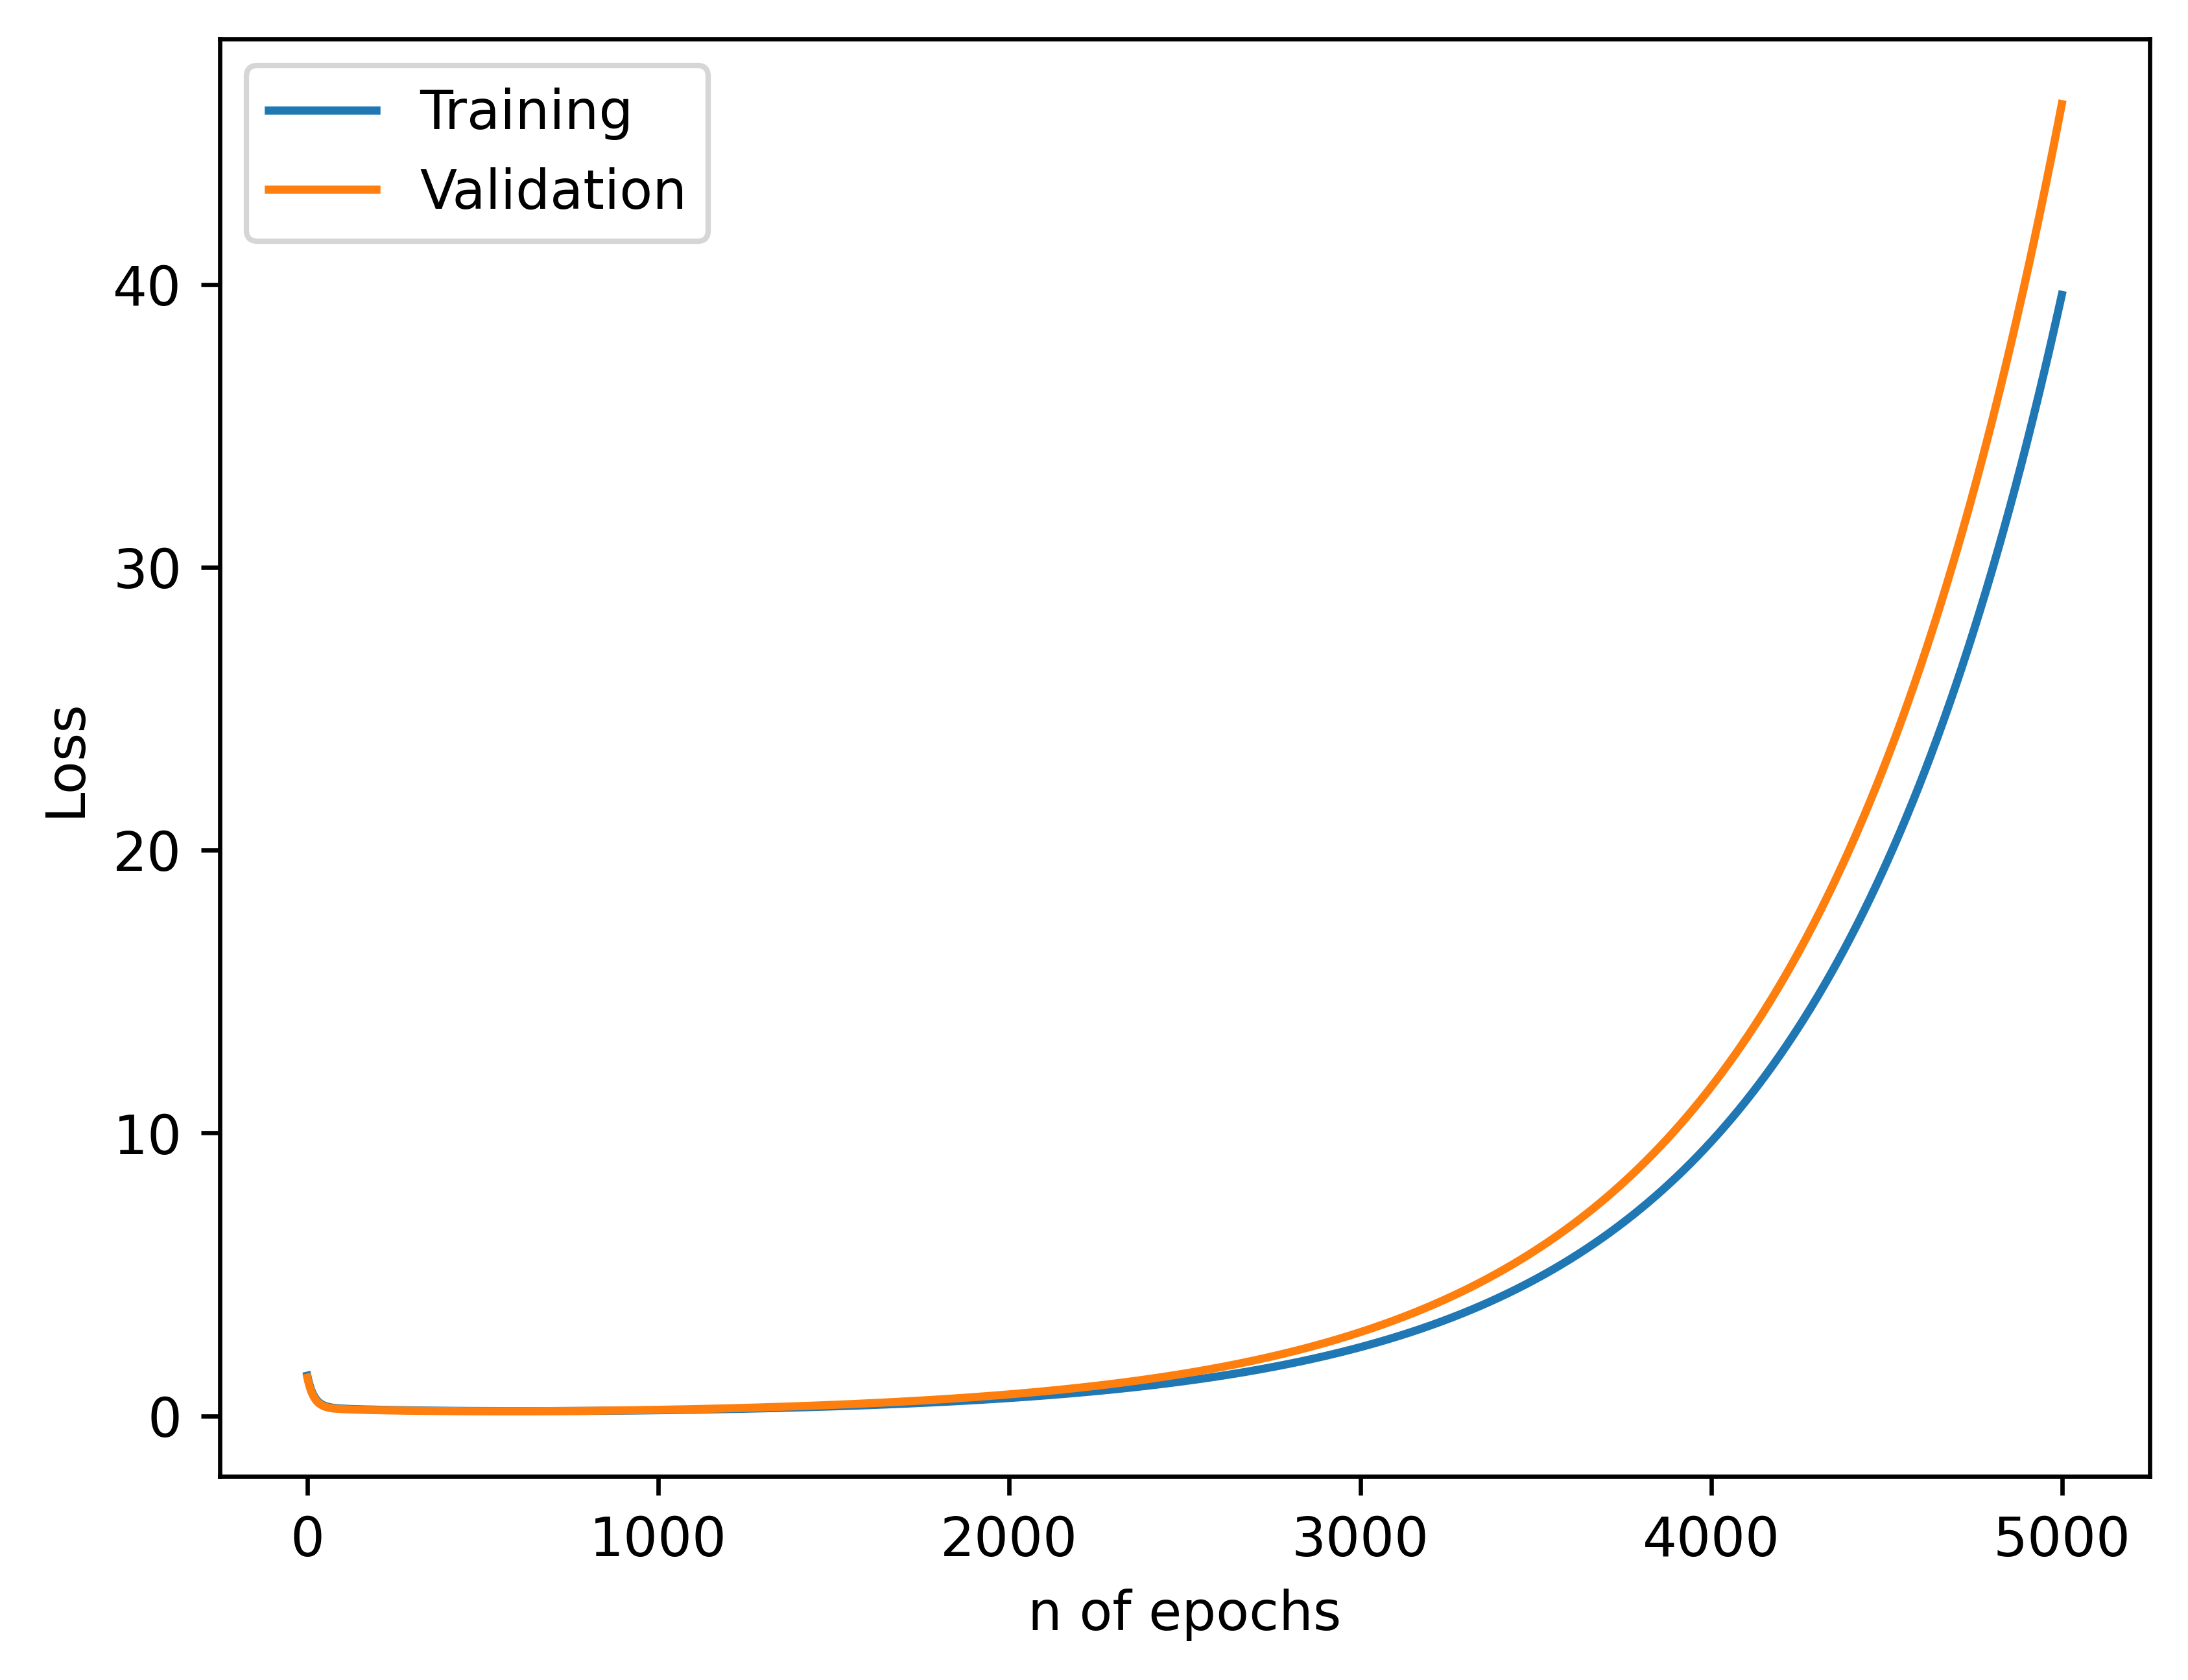

Epoch 1, Training Loss 1.421621, Validation Loss 1.353947 
Epoch 500, Training Loss 0.359139, Validation Loss 0.329952 
Epoch 1000, Training Loss 0.258078, Validation Loss 0.237882 
Epoch 1500, Training Loss 0.233276, Validation Loss 0.215805 
Epoch 2000, Training Loss 0.217526, Validation Loss 0.201557 
Epoch 2500, Training Loss 0.204929, Validation Loss 0.190268 
Epoch 3000, Training Loss 0.194616, Validation Loss 0.181269 
Epoch 3500, Training Loss 0.186273, Validation Loss 0.174284 
Epoch 4000, Training Loss 0.179691, Validation Loss 0.169120 
Epoch 4500, Training Loss 0.174709, Validation Loss 0.165624 
Epoch 5000, Training Loss 0.171192, Validation Loss 0.163671 
Prameters: tensor([-0.2032,  0.2808,  0.6641,  0.6601,  0.7914, -0.2382],
       dtype=torch.float64)


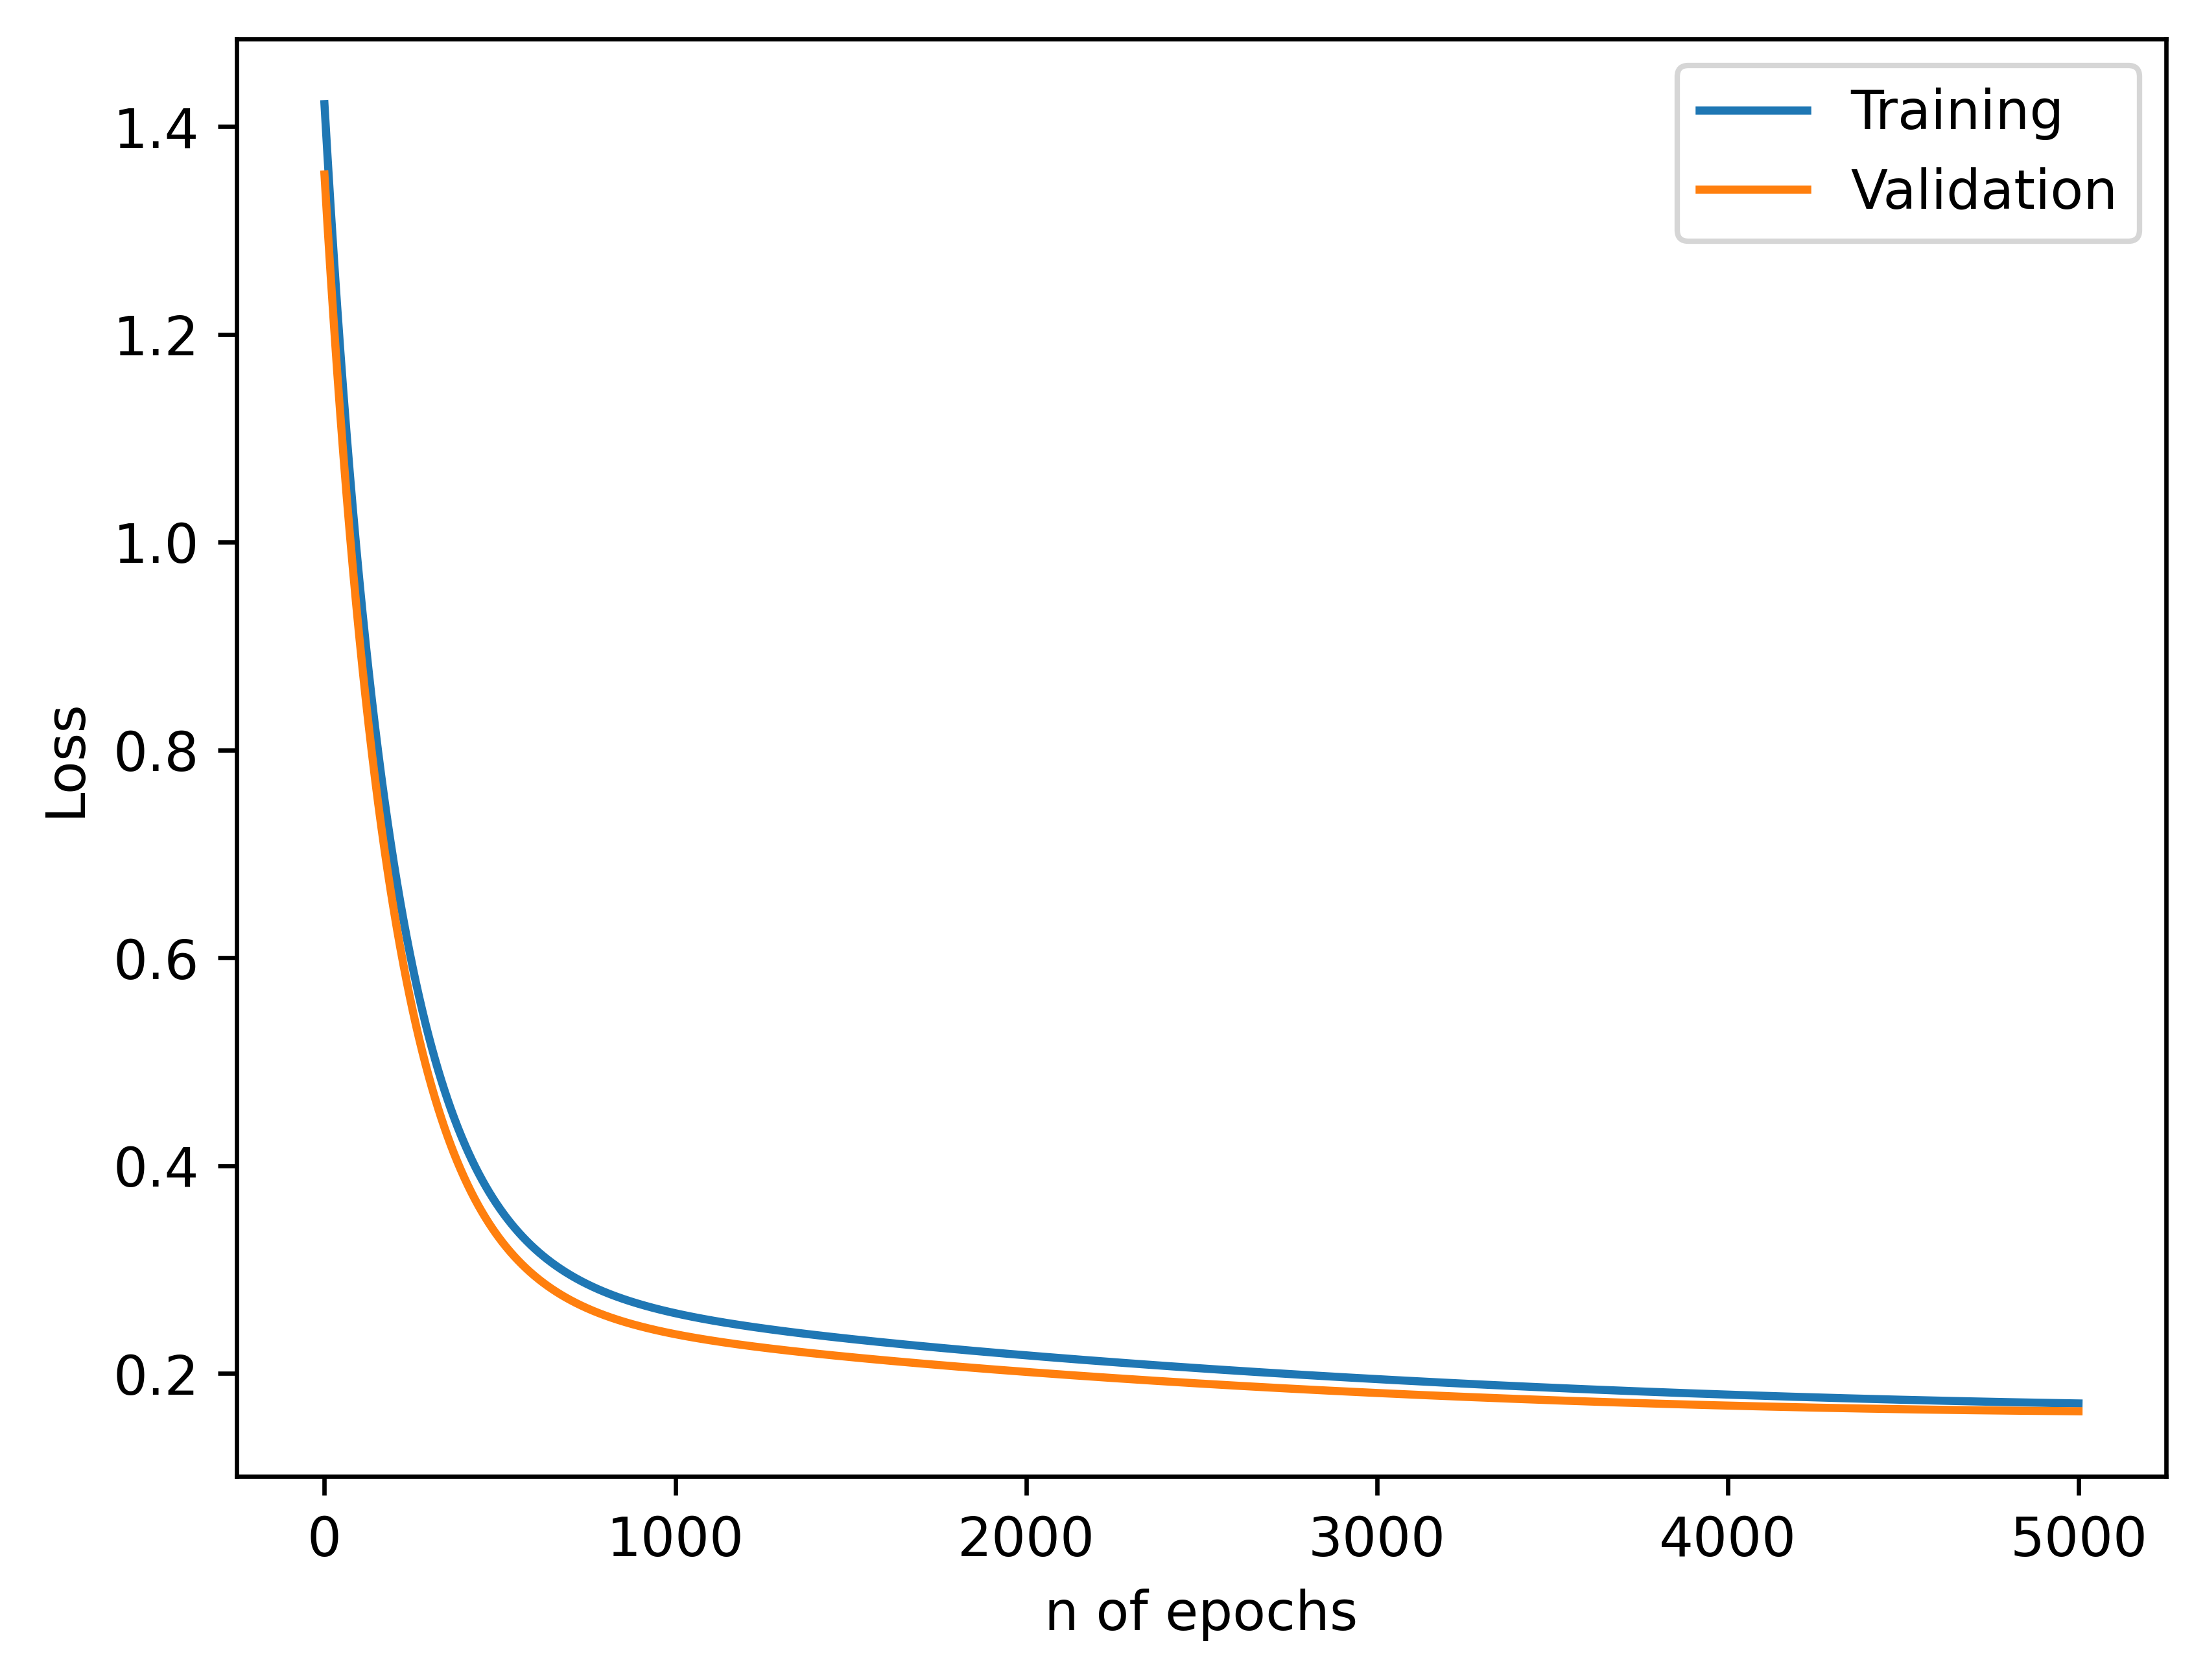

Epoch 1, Training Loss 1.421621, Validation Loss 1.353947 
Epoch 500, Training Loss 1.162773, Validation Loss 1.101969 
Epoch 1000, Training Loss 0.962314, Validation Loss 0.907442 
Epoch 1500, Training Loss 0.807252, Validation Loss 0.757490 
Epoch 2000, Training Loss 0.687142, Validation Loss 0.641780 
Epoch 2500, Training Loss 0.593951, Validation Loss 0.552380 
Epoch 3000, Training Loss 0.521499, Validation Loss 0.483193 
Epoch 3500, Training Loss 0.465031, Validation Loss 0.429538 
Epoch 4000, Training Loss 0.420889, Validation Loss 0.387820 
Epoch 4500, Training Loss 0.386256, Validation Loss 0.355279 
Epoch 5000, Training Loss 0.358965, Validation Loss 0.329793 
Prameters: tensor([ 0.7403,  0.7633,  0.8973,  0.7555,  0.8546, -0.5058],
       dtype=torch.float64)


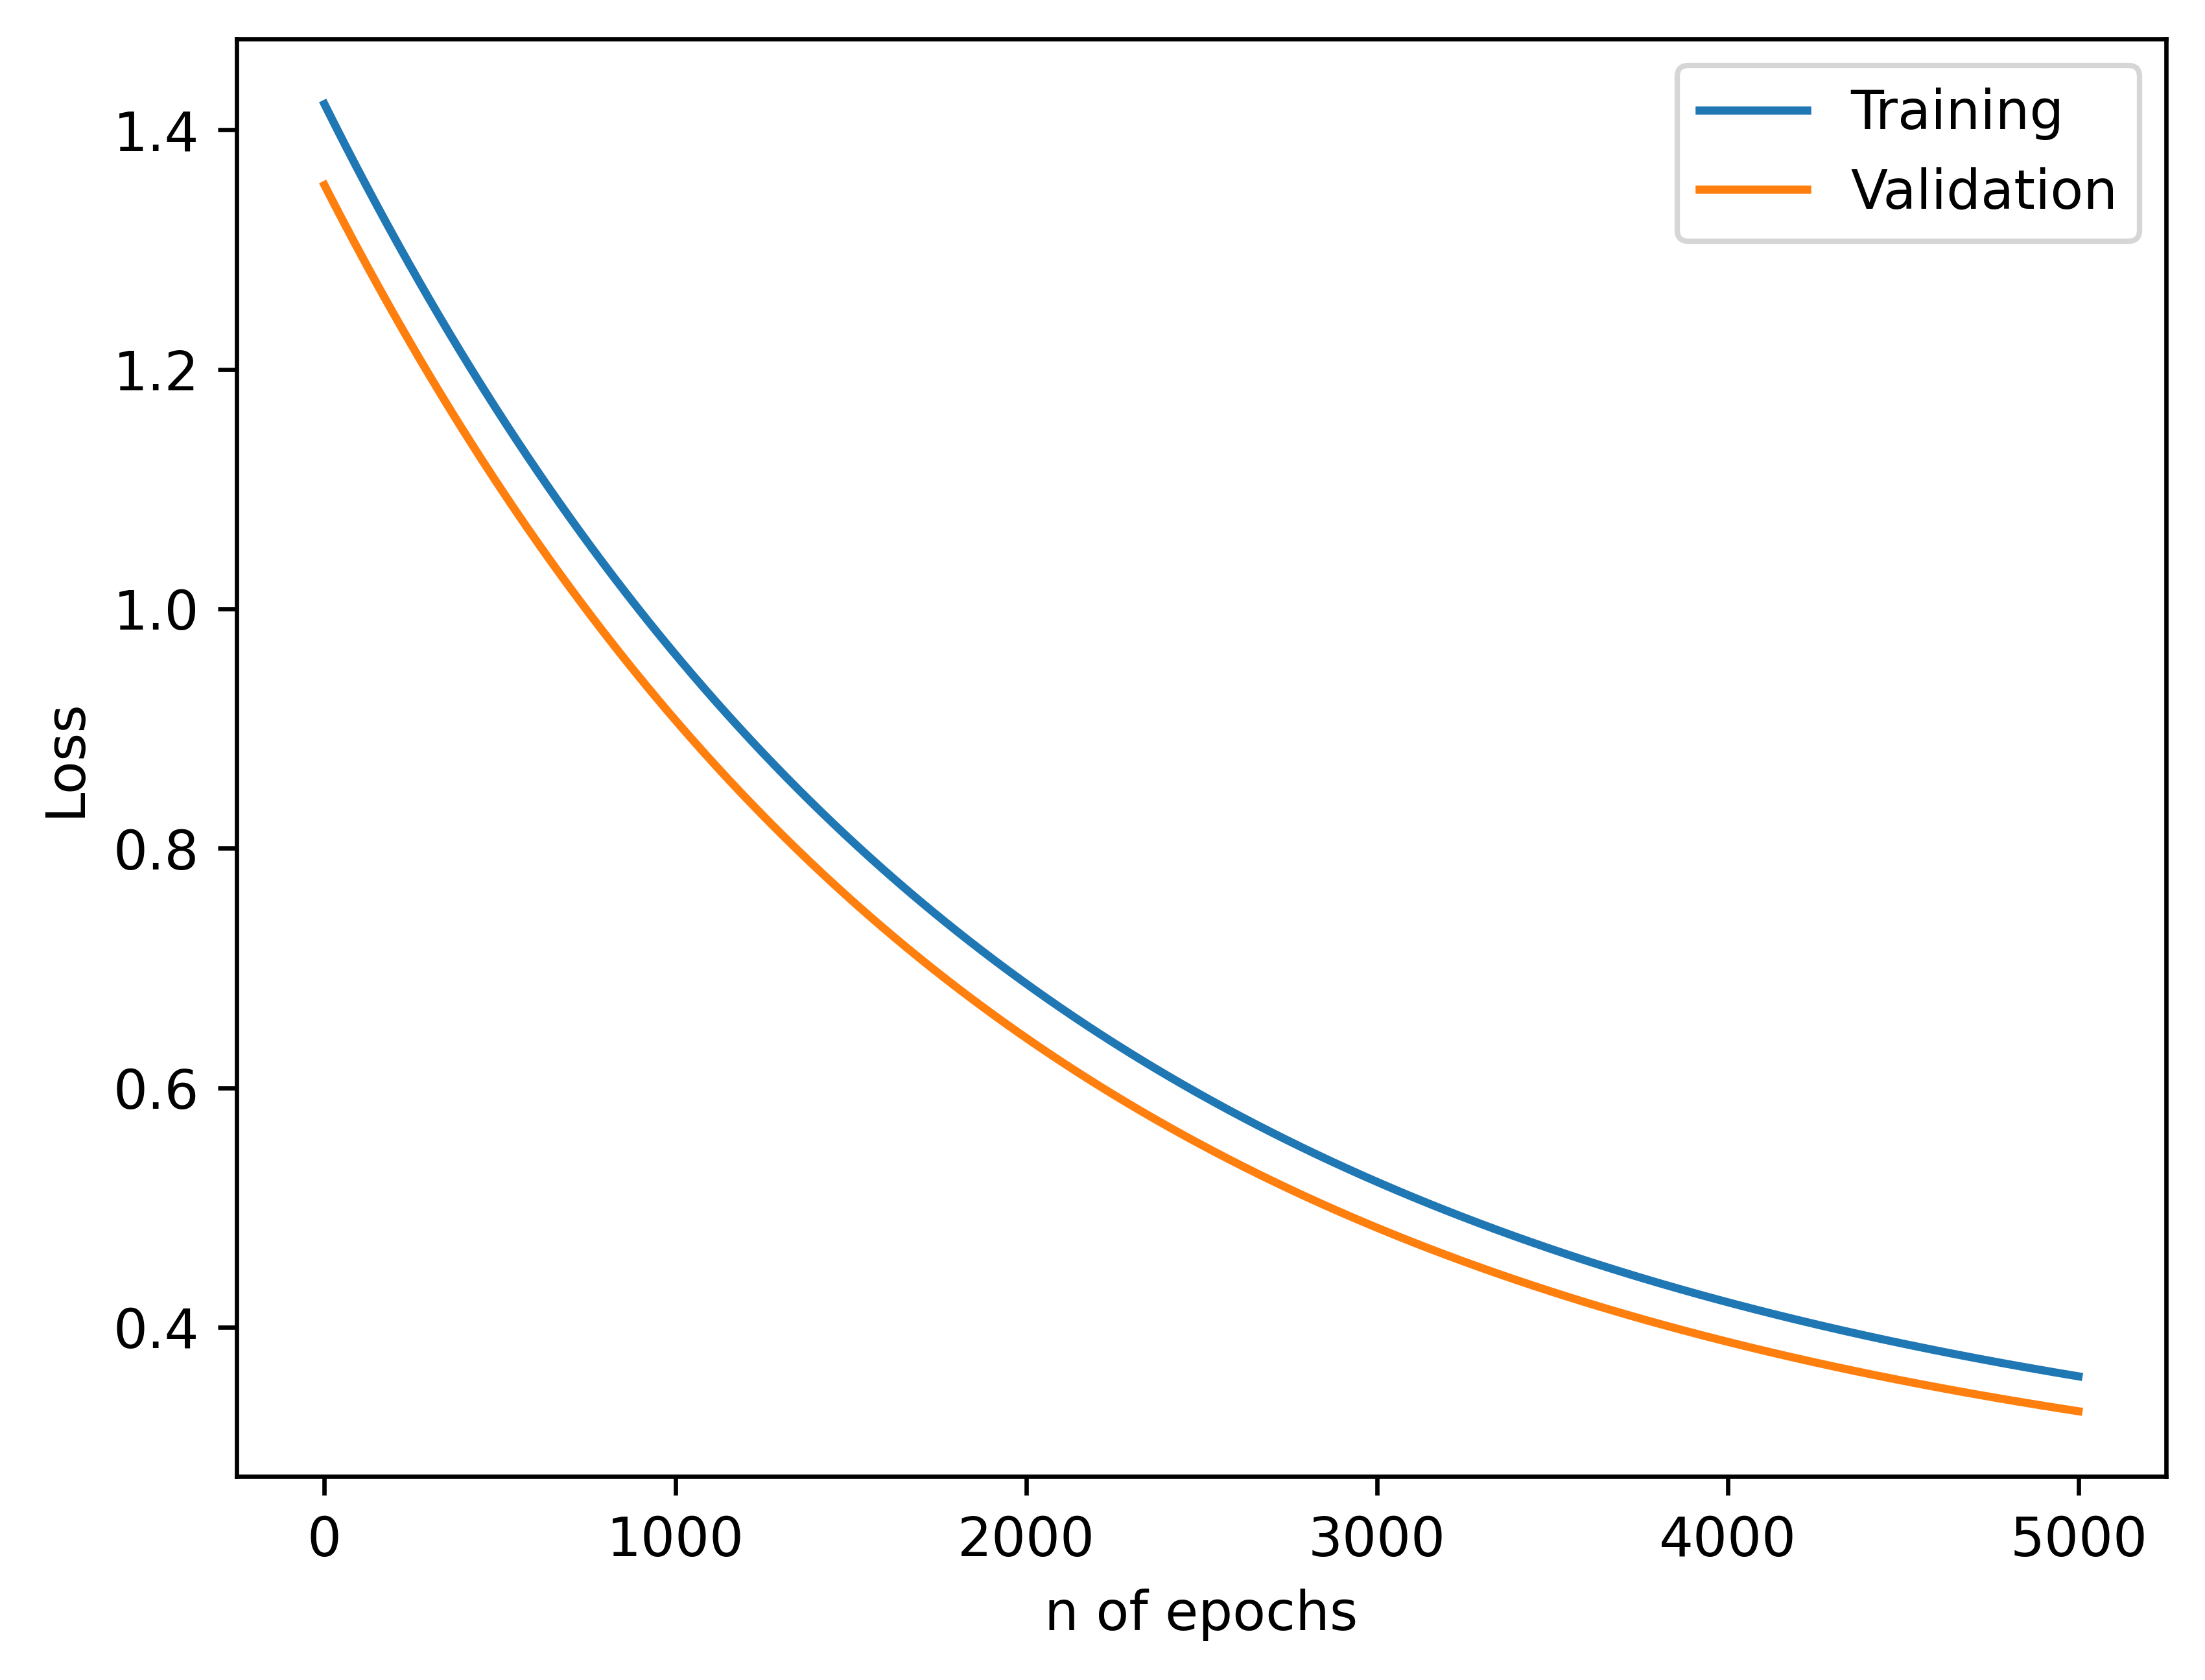

0.1


In [13]:
rate = [.1, .01, .001, .0001]

min_loss = []
min_loss.append(10000)

for r in rate:
    params, train_loss_history, test_loss_history = training_loop(n_epochs = 5000, 
                                                                  learning_rate = r, 
                                                                  params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0]), 
                                                                  t_u = x_train, 
                                                                  t_c = y_train)

    if min(min_loss) > min(test_loss_history):
        min_loss = test_loss_history
        min_rate = r
        
    print('Prameters:', params)

    epochs = []
    for n in range(0,5000):
        epochs.append(n)
    
    fig = plt.figure(dpi=600)
    plt.plot(epochs, train_loss_history, label = 'Training')
    plt.plot(epochs, test_loss_history, label = 'Validation')
    plt.ylabel("Loss")
    plt.xlabel("n of epochs")
    plt.legend()
    plt.show()
    

print(min_rate)